# Handwritten (A-Z) Character Recognition

###  Importing Libraries

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading Dataset and Analyzing it

In [4]:
data = pd.read_csv('/content/drive/MyDrive/AI/A_Z Handwritten Data.csv')

In [5]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [7]:
data.shape

(372450, 785)

In [8]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [9]:
data.isnull().sum()

,0
0,0
0.1,0
0.2,0
0.3,0
0.4,0
...,...
0.644,0
0.645,0
0.646,0
0.647,0


In [10]:
my_data = data.values
my_data

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0]])

### Splitting x and y column from dataset

In [11]:
X = my_data[:,1:]
y = my_data[:,:1]

In [12]:
print(X.shape)
print(y.shape)

(372450, 784)
(372450, 1)


### Split into train and validation set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#reshaping to 28*28 pixels from 784
X_train = np.reshape(X_train,(X_train.shape[0],28,28))
X_test = np.reshape(X_test,(X_test.shape[0],28,28))

In [14]:
print(X_train.shape)
print(X_test.shape)

(297960, 28, 28)
(74490, 28, 28)


In [15]:
print(y_train.shape)
print(y_test.shape)

(297960, 1)
(74490, 1)


### Plotting number of images for each alphabet from Dataset

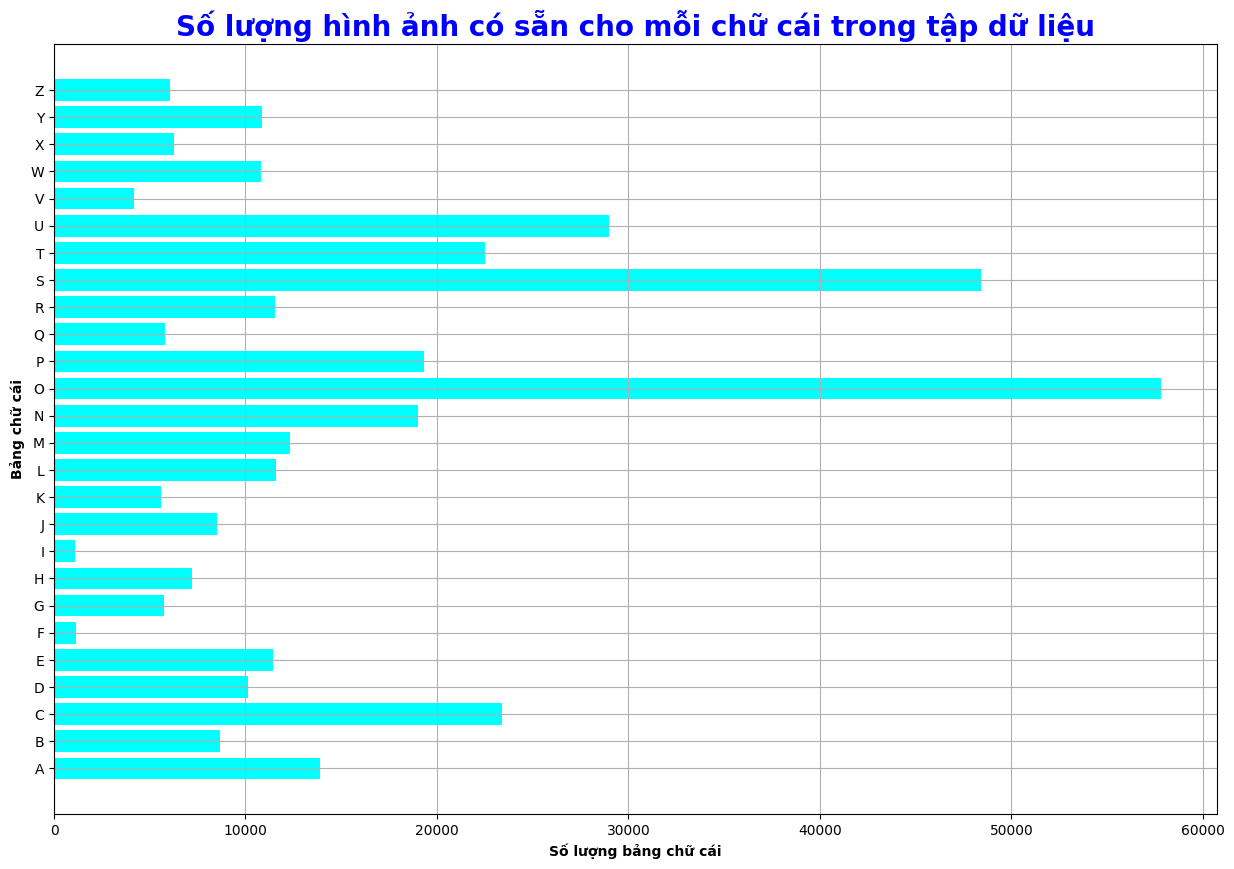

In [16]:
count = np.zeros(26, dtype = 'int')

#counting each label
for i in y:
    count[i] += 1


#creating a list of alphabets
alphabets = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

plt.figure(figsize=(15,10))
plt.barh(alphabets, count, color = "cyan")
plt.xlabel("Số lượng bảng chữ cái",fontsize = 10, fontweight = 'bold')
plt.ylabel("Bảng chữ cái",fontsize = 10, fontweight = 'bold')
plt.title("Số lượng hình ảnh có sẵn cho mỗi chữ cái trong tập dữ liệu", fontsize = 20, fontweight = 'bold', color = "blue")
plt.grid()
plt.show()

### Show random images

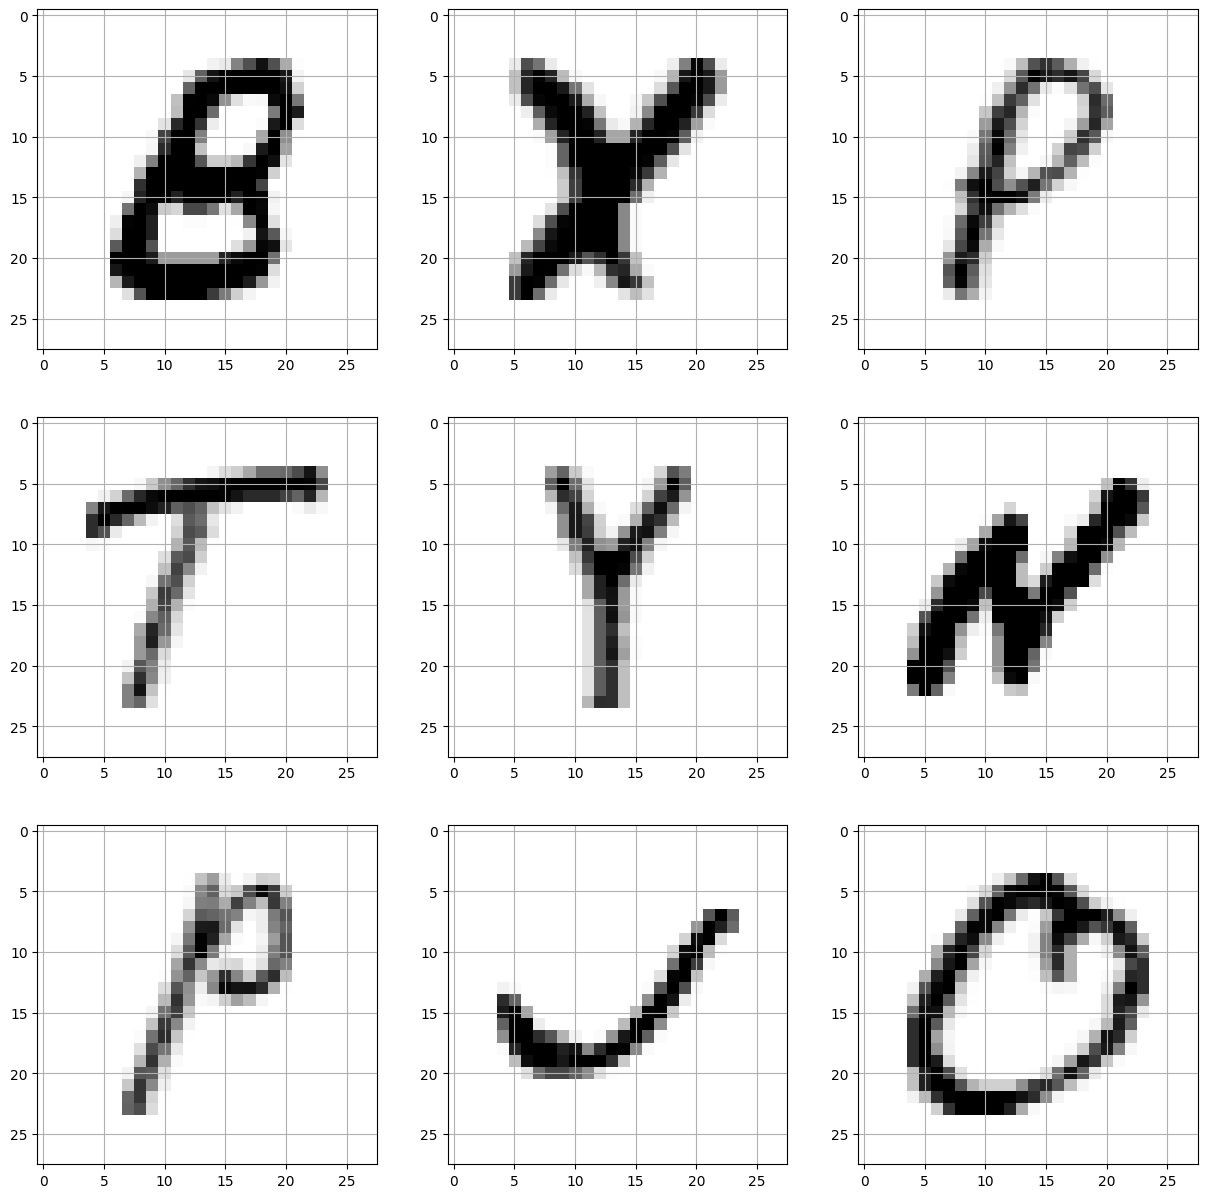

In [17]:
img_list = shuffle(X_train[:1000])
fig,ax = plt.subplots(3,3,figsize=(15,15))
axes = ax.flatten()
for i in range(9):
    axes[i].imshow(img_list[i],cmap="Greys")
    axes[i].grid()
plt.show()

### Reshaping train & test images from dataset to put in the CNN Model

In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

print("New shape of train and test dataset")
print(X_train.shape)
print(X_test.shape)

New shape of train and test dataset
(297960, 28, 28, 1)
(74490, 28, 28, 1)


### Downsampling the images to make them in the range of (0-1)

In [19]:
X_train = X_train/255.
X_test = X_test/255.

### Convert the int values of labels to categorical values of 26

In [20]:
categorical_ytrain = to_categorical(y_train, num_classes = 26)
categorical_ytrain=categorical_ytrain.astype('int')
print("New shape of train labels:", categorical_ytrain.shape)

categorical_ytest = to_categorical(y_test, num_classes = 26)
categorical_ytest=categorical_ytest.astype('int')
print("New shape of test labels:", categorical_ytest.shape)

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


### CNN Model Architecture

In [21]:
model = Sequential()

#First Conv1D layer
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2))

#Second Conv1D layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Third Conv1D layer
model.add(Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Flatten layer
model.add(Flatten())

#Dense layer 1
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

#Dense layer 2
model.add(Dense(64,activation = 'relu'))

#Final layer of 26 nodes
model.add(Dense(26,activation = 'softmax'))

#Define the loss function to be categorical cross-entropy since it is a multi-classification problem:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### Early stopping and model checkpoints are the callbacks to stop training the neural network at the right time and to save the best model after every epoch:

In [22]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001)
mc = ModelCheckpoint('modelHandWritten.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

##### Training the model and evaluate the performance on the holdout set:

In [23]:
history = model.fit(x = X_train, y = categorical_ytrain, epochs = 100, callbacks=[es,mc], validation_data = (X_test,categorical_ytest))

Epoch 1/100
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9033 - loss: 0.3391
Epoch 1: val_accuracy improved from -inf to 0.98299, saving model to modelHandWritten.h5


9312/9312 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 0.9033 - loss: 0.3391 - val_accuracy: 0.9830 - val_loss: 0.0636
Epoch 2/100
9300/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9819 - loss: 0.0663
Epoch 2: val_accuracy improved from 0.98299 to 0.98848, saving model to modelHandWritten.h5


9312/9312 ━━━━━━━━━━━━━━━━━━━━ 72s 4ms/step - accuracy: 0.9819 - loss: 0.0663 - val_accuracy: 0.9885 - val_loss: 0.0466
Epoch 3/100
9298/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9870 - loss: 0.0468
Epoch 3: val_accuracy did not improve from 0.98848
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.9870 - loss: 0.0468 - val_accuracy: 0.9880 - val_loss: 0.0470
Epoch 4/100
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9892 - loss: 0.0385
Epoch 4: val_accuracy improved from 0.98848 to 0.98982, saving model to modelHandWritten.h5


9312/9312 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.9892 - loss: 0.0385 - val_accuracy: 0.9898 - val_loss: 0.0388
Epoch 5/100
9298/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9903 - loss: 0.0333
Epoch 5: val_accuracy improved from 0.98982 to 0.99015, saving model to modelHandWritten.h5


9312/9312 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.9903 - loss: 0.0333 - val_accuracy: 0.9901 - val_loss: 0.0403
Epoch 6/100
9302/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0281
Epoch 6: val_accuracy did not improve from 0.99015
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.9917 - loss: 0.0281 - val_accuracy: 0.9898 - val_loss: 0.0425
Epoch 7/100
9302/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9925 - loss: 0.0262
Epoch 7: val_accuracy improved from 0.99015 to 0.99145, saving model to modelHandWritten.h5


9312/9312 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9925 - loss: 0.0262 - val_accuracy: 0.9914 - val_loss: 0.0368
Epoch 8/100
9300/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9932 - loss: 0.0246
Epoch 8: val_accuracy did not improve from 0.99145
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9932 - loss: 0.0246 - val_accuracy: 0.9911 - val_loss: 0.0395
Epoch 9/100
9311/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9934 - loss: 0.0229
Epoch 9: val_accuracy improved from 0.99145 to 0.99162, saving model to modelHandWritten.h5


9312/9312 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - accuracy: 0.9934 - loss: 0.0229 - val_accuracy: 0.9916 - val_loss: 0.0394
Epoch 10/100
9302/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9934 - loss: 0.0223
Epoch 10: val_accuracy improved from 0.99162 to 0.99266, saving model to modelHandWritten.h5


9312/9312 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.9934 - loss: 0.0223 - val_accuracy: 0.9927 - val_loss: 0.0351
Epoch 11/100
9311/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9939 - loss: 0.0218
Epoch 11: val_accuracy did not improve from 0.99266
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.9939 - loss: 0.0218 - val_accuracy: 0.9919 - val_loss: 0.0388
Epoch 12/100
9304/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9941 - loss: 0.0208
Epoch 12: val_accuracy did not improve from 0.99266
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9941 - loss: 0.0208 - val_accuracy: 0.9926 - val_loss: 0.0389
Epoch 13/100
9308/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9948 - loss: 0.0188
Epoch 13: val_accuracy did not improve from 0.99266
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.9948 - loss: 0.0188 - val_accuracy: 0.9925 - val_loss: 0.0407
Epoch 14/100
9303/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9945 - loss: 0.0201
Epoc

9312/9312 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9949 - loss: 0.0187 - val_accuracy: 0.9937 - val_loss: 0.0356
Epoch 17/100
9310/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9956 - loss: 0.0162
Epoch 17: val_accuracy did not improve from 0.99370
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9956 - loss: 0.0162 - val_accuracy: 0.9934 - val_loss: 0.0407
Epoch 18/100
9298/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9949 - loss: 0.0187
Epoch 18: val_accuracy did not improve from 0.99370
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9949 - loss: 0.0187 - val_accuracy: 0.9928 - val_loss: 0.0453
Epoch 19/100
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9951 - loss: 0.0178
Epoch 19: val_accuracy did not improve from 0.99370
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.9951 - loss: 0.0178 - val_accuracy: 0.9929 - val_loss: 0.0438
Epoch 20/100
9306/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9953 - loss: 0.0177
Epoc

In [24]:
#evaluating model on test dataset
model.evaluate(X_test,categorical_ytest)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9930 - loss: 0.0530


[0.04911569878458977, 0.9931400418281555]

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 504,848 (1.93 MB)

 Trainable params: 168,282 (657.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 336,566 (1.28 MB)

### Find accuracy, losses of Model

In [26]:
print("The validation accuracy is :", history.history['val_accuracy'][-1])
print("The training accuracy is :", history.history['accuracy'][-1])
print("The validation loss is :", history.history['val_loss'][-1])
print("The training loss is :", history.history['loss'][-1])

The validation accuracy is : 0.9931400418281555
The training accuracy is : 0.9951872825622559
The validation loss is : 0.04911569878458977
The training loss is : 0.01863250881433487


#### Plotting the Model loss and Accuracy on the line graph

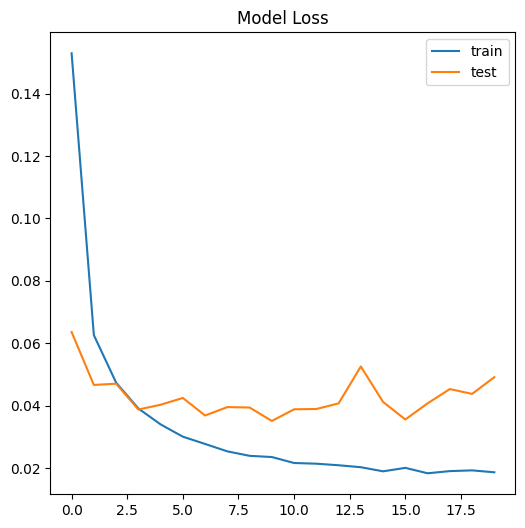

In [27]:
plt.figure(figsize = (6,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Model Loss")
plt.show()

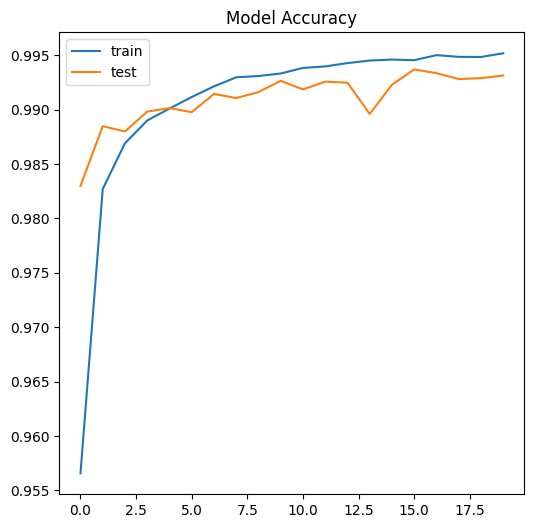

In [28]:
plt.figure(figsize = (6,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title("Model Accuracy")
plt.show()

### Making prediction of test data

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


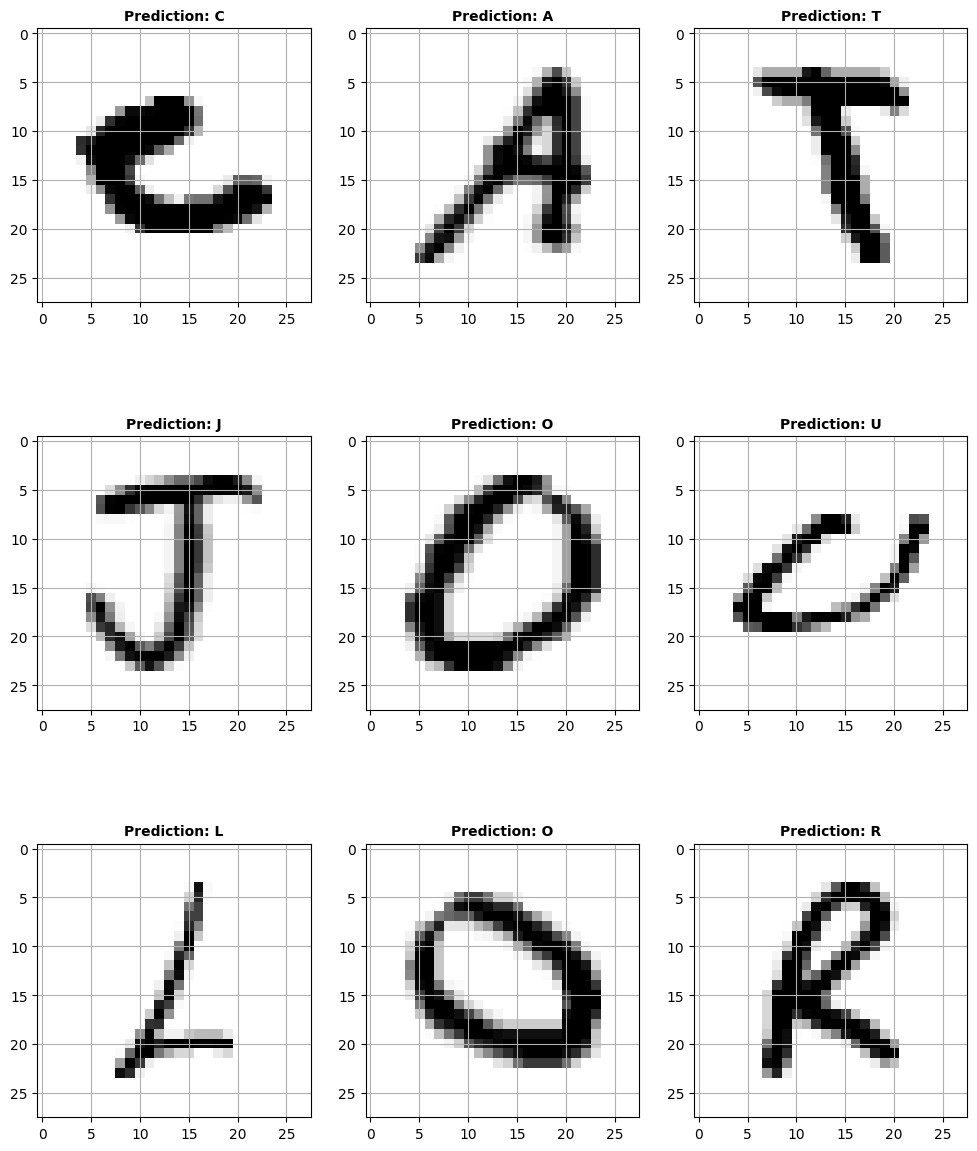

In [29]:
#creating a dictionary of letters with index
dict_word = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

img_list_test = shuffle(X_test[:1000])
fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i in range(9):
    img = np.reshape(X_test[i], (28, 28))
    axes[i].imshow(img_list_test[i],cmap="Greys")

    pred = dict_word[np.argmax(model.predict(np.reshape(img_list_test[i],(1,28,28,1))))]
    axes[i].set_title("Prediction: " + pred, fontsize = 10, fontweight = 'bold')
    axes[i].grid()